# Problem statement : Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.



# Performed by : Adarsh Poojary

In [2]:
import pandas as pd
file_path='C:/Users/Adarsh Poojary/PRODIGY_DS_03/bank-full.csv'
df=pd.read_csv('C:/Users/Adarsh Poojary/PRODIGY_DS_03/bank-full.csv',sep=';')


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [12]:
# Label encode the target variable 'y'
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

In [13]:
# Split dataset into features and target
X = df.drop('y', axis=1)
y = df['y']

In [14]:
# One-hot encode the categorical features
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [15]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Let's check the shapes of the train and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((36168, 42), (9043, 42), (36168,), (9043,))

# Decision Tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [18]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [19]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score 

def eval_model(y_test,y_pred): 
    acc = accuracy_score(y_test,y_pred)
    print ('Accuracy_Score', acc)
    cm = confusion_matrix(y_test,y_pred)
    print ('Confusion Matrix\n',cm)
    print( 'Classification Report\n', classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print( 'Training Score', train_score)
    print ('Testing Score', test_score)

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(criterion ='gini',max_depth=5,min_samples_split=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [35]:
mscore(dt)

Training Score 0.9065748728157488
Testing Score 0.8973791883224593


In [39]:
ypred_dt = dt.predict(X_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [40]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8973791883224593
Confusion Matrix
 [[7753  199]
 [ 729  362]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [41]:
from sklearn.tree import plot_tree

In [43]:
cn = ['no','yes']
fn = X_train.columns
print(fn)
print(cn)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')
['no', 'yes']


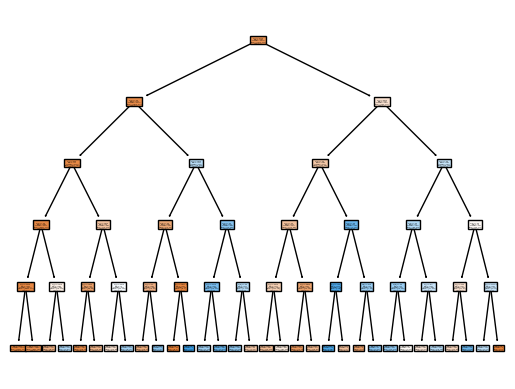

In [44]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [45]:

dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [46]:
mscore(dt1)

Training Score 0.9015151515151515
Testing Score 0.8942828707287405


In [47]:
ypred_dt1 = dt1.predict(X_test)

In [48]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.8942828707287405
Confusion Matrix
 [[7783  169]
 [ 787  304]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.64      0.28      0.39      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.63      0.67      9043
weighted avg       0.88      0.89      0.88      9043



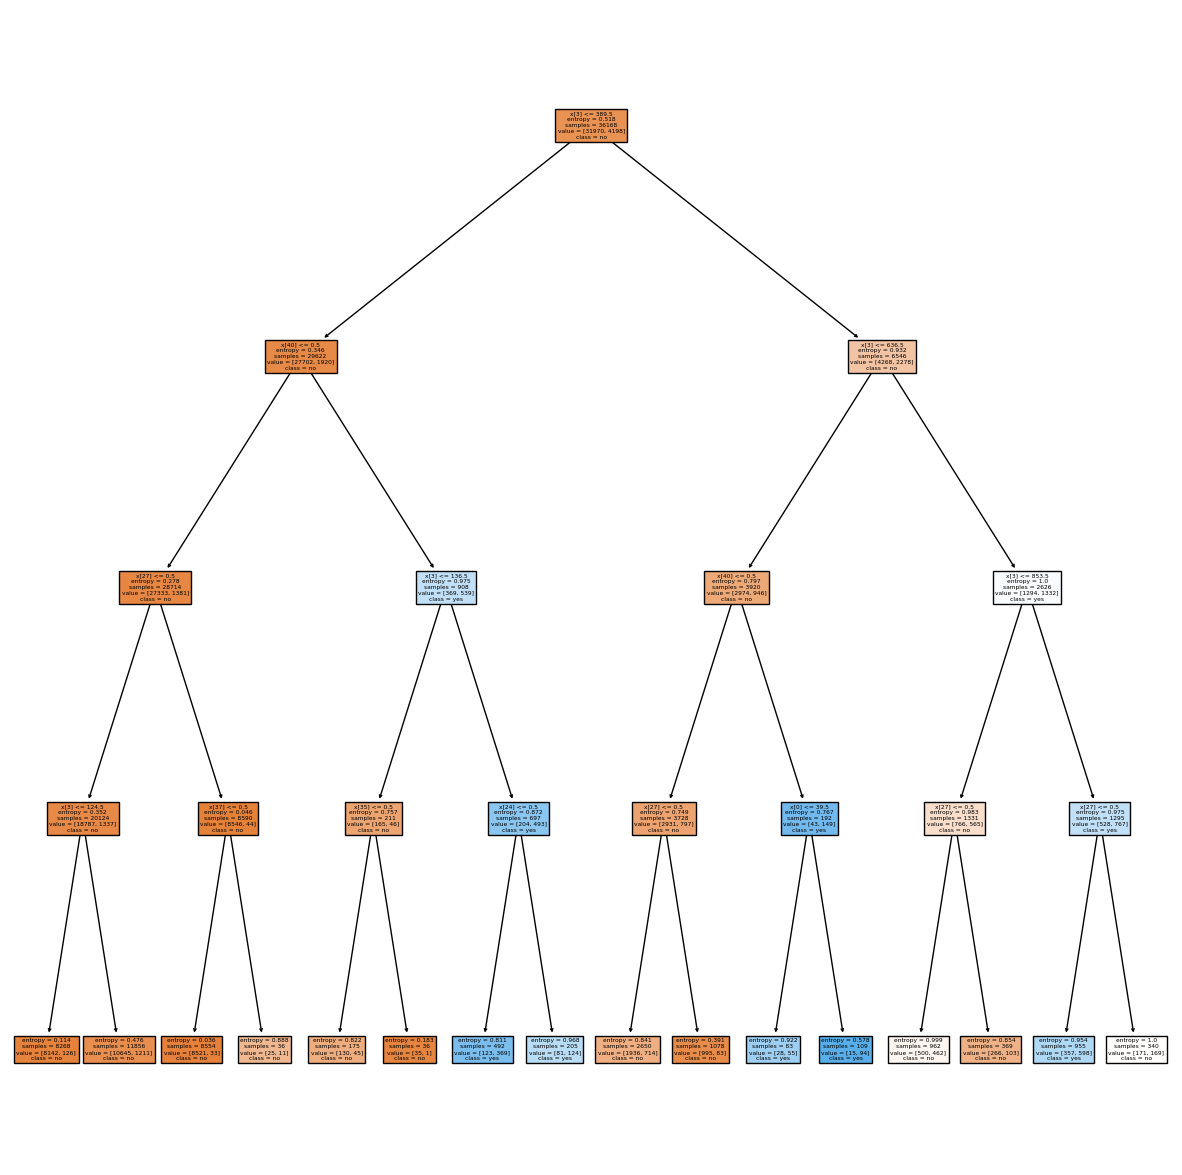

In [49]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()